## Assignment 

For a dating app there are 4 users (two male & two female), they answer the same 10 onboarding compatibility Qs while setting up their user profiles. These compatibility questions sample will be attached in this mail. Create a ML model using python & AI ML framework of your choice to analyse their matching probability. Also provide some examples of how this ML model can be integrated with the backend of a Flutter App.

#### Importing the required libraries

In [1]:
import requests
import pandas as pd
import time
import random
import re
import numpy as np
import _pickle as pickle
from tqdm import tqdm_notebook as tqdm
from bs4 import BeautifulSoup as bs
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#### Scraping data using BeautifulSoup

I have scraped data from the website - Fakepersongenerator to create 10 dating profiles for checking the usability of the ML algorith created. 

In [2]:
biolist = []
page = requests.get("https://www.fakepersongenerator.com/user-biography-generator")
soup = bs(page.content)
bios = soup.find('div', class_='row no-margin for-sign').find_all('p')
biolist.extend([re.findall('"([^"]*)"', i.text) for i in bios])

#### Creating a dataframe from the bio list

In [3]:
data = pd.DataFrame(biolist, columns=['Bios'])
data.head(10)

,Bios
0,Wannabe beer guru. Professional food scholar. Thinker. Bacon expert. Travel maven. Friendly social media aficionado. Internet buff.
1,Problem solver. Internet scholar. Travel geek. Unapologetic music evangelist.
2,Freelance gamer. Zombie trailblazer. Alcoholaholic. Hardcore social media guru.
3,Social media expert. Gamer. Unapologetic food fanatic. Freelance internet guru. Subtly charming explorer.
4,Total explorer. Wannabe travel lover. Devoted troublemaker. Food buff. Gamer. Future teen idol. Thinker. Web guru. Infuriatingly humble bacon practitioner.
5,Unapologetic music guru. Hipster-friendly social media geek. Amateur internet enthusiast. Zombie advocate.
6,Twitter geek. Professional problem solver. Zombie lover. Avid social media fan. Music scholar.
7,Travel maven. Hardcore alcohol scholar. Baconaholic. Lifelong tv advocate. Beer lover.
8,Food fan. Zombie lover. Subtly charming reader. Coffee junkie. Social media trailblazer.
9,Explorer. Tv maven. Certified social media fan. Hipster-friendly beer lover. Web scholar.


In [4]:
data.shape

(15, 1)

In [5]:
# Adding attributes
qs = ['TV','Movies','Music','Sports','Books','Religion','Travel']

# Creating a df of the categories
topic_df = pd.DataFrame(columns=qs)

# Filling in Data
for i in topic_df.columns:
    
    # Range of numbers to represent different labels in each category
    topic_df[i] = np.random.randint(0,10, data.shape[0])

# Joining df
final_data = data.join(topic_df)

with open("profiles.pkl", "wb") as fp:
    pickle.dump(final_data, fp)

In [6]:
final_data = final_data[:4]
final_data['gender'] = [0 if x<2 else 1 for x in range(len(final_data))]
final_data.head()

,Bios,TV,Movies,Music,Sports,Books,Religion,Travel,gender
0,Wannabe beer guru. Professional food scholar. Thinker. Bacon expert. Travel maven. Friendly social media aficionado. Internet buff.,6,0,0,9,5,1,2,0
1,Problem solver. Internet scholar. Travel geek. Unapologetic music evangelist.,9,6,0,4,8,4,7,0
2,Freelance gamer. Zombie trailblazer. Alcoholaholic. Hardcore social media guru.,6,3,2,6,6,1,3,1
3,Social media expert. Gamer. Unapologetic food fanatic. Freelance internet guru. Subtly charming explorer.,7,9,1,6,0,5,4,1


#### 0 represent male and 1 female

In [7]:
final_data['gender'].value_counts()

1    2
0    2
Name: gender, dtype: int64

#### Tokenizing Function

Cleaning the data using tokenization, stopword removal, lemmatization, etc)

In [8]:
def tokenize(text):

    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text


In [9]:
scaler = MinMaxScaler()
# Scaling the categories then replacing the old values
df = final_data[['Bios']].join(pd.DataFrame(scaler.fit_transform(final_data.drop('Bios',axis=1)), 
                                          columns=final_data.columns[1:], index=final_data.index))

In [10]:
df.head()

,Bios,TV,Movies,Music,Sports,Books,Religion,Travel,gender
0,Wannabe beer guru. Professional food scholar. Thinker. Bacon expert. Travel maven. Friendly social media aficionado. Internet buff.,0.000000,0.000000,0.0,1.0,0.625,0.00,0.0,0.0
1,Problem solver. Internet scholar. Travel geek. Unapologetic music evangelist.,1.000000,0.666667,0.0,0.0,1.000,0.75,1.0,0.0
2,Freelance gamer. Zombie trailblazer. Alcoholaholic. Hardcore social media guru.,0.000000,0.333333,1.0,0.4,0.750,0.00,0.2,1.0
3,Social media expert. Gamer. Unapologetic food fanatic. Freelance internet guru. Subtly charming explorer.,0.333333,1.000000,0.5,0.4,0.000,1.00,0.4,1.0


In [11]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

# Concating the words DF with the original DF
new_data = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_data.drop('Bios', axis=1, inplace=True)

In [12]:
new_data.head()

,TV,Movies,Music,Sports,Books,Religion,Travel,gender,aficionado,alcoholaholic,...,scholar,social,solver,subtly,thinker,trailblazer,travel,unapologetic,wannabe,zombie
0,0.000000,0.000000,0.0,1.0,0.625,0.00,0.0,0.0,1,0,...,1,1,0,0,1,0,1,0,1,0
1,1.000000,0.666667,0.0,0.0,1.000,0.75,1.0,0.0,0,0,...,1,0,1,0,0,0,1,1,0,0
2,0.000000,0.333333,1.0,0.4,0.750,0.00,0.2,1.0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.333333,1.000000,0.5,0.4,0.000,1.00,0.4,1.0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [13]:
new_data.shape

(4, 41)

#### Correlation Plot

The correlation plot is created to understand if there is any relation between two features which would end up impacting the prediction of the matches for the dating profile.

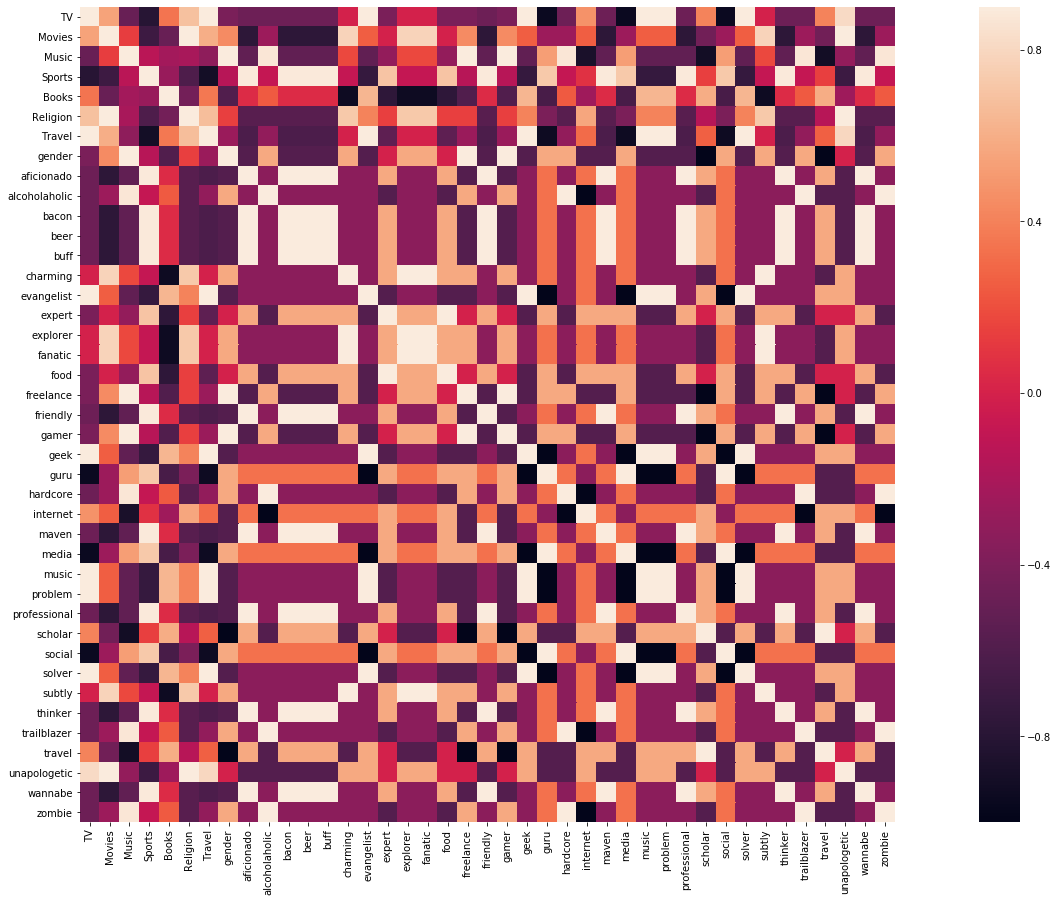

In [14]:
corrmat = new_data.corr()

plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, vmax=.9, square=True)

In [15]:
# Finding Correlations among the users
corr_group = new_data.T.corr()

# Finding the Similar Users
# Randomly selecting a user
random_user = random.choice(corr_group.index)

print("Top similar users to User #", random_user, '\n')

# Creating a df with the most similar users to the selected user
top_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)

# Printing out the results
print(top_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_sim.index[1])

Top similar users to User # 1 

          1
1  1.000000
3 -0.183004
0 -0.267004
2 -0.359837

The most similar user to User # 1 is User # 3


#### Q. How ML model can be integrated with the backend of a Flutter App?

The ML model can be intergrated with the backend of a Flutter App by:

1) Firebase MLKit - Allows developers to import Google's machine learning expertise from the firebase console.

2) Models as APIs - Developers wrap the model in API services and host it using web-based servers.

3) On-Device Model - The primary way to use this model is to firstly create them as TensorFlow models. To export them as .tflite files, you can use the ML Kit plugin in your flutter app. Before shipping the file, you need to import the stored .tfilte file from the project repository and make it run for the interface.

The last method is the ideal choice of integration and need not provide for regular updates. 